### 재귀 알고리즘의 2가지 분석 방법

In [3]:
# 순수한 재귀 함수 구현하기

def recur(n: int) -> int:
    """순수한 재귀 함수 recur의 구현"""
    if n > 0:
        recur(n - 1)
        print(n)
        recur(n - 2)
        
x = int(input('정숫값을 입력하세요.: '))

recur(x)

정숫값을 입력하세요.: 5
1
2
3
1
4
1
2
5
1
2
3
1


recur() 함수는 앞에서 다룬 factorial() 함수나 gcd() 함수와 달리 함수 안에서 재귀 호출을 2번 실행합니다.
이처럼 재귀 호출을 여러 번 실행하는 삼수를 순수한(genuinely) 재귀라고 하는데 실제 동작은 복잡합니다. <br>
재귀 호출하는 recur() 함수를 하향식(top-down)과 상향식(botton-up) 방법으로 분석해 보겠습니다.

#### 하향식 분석

recur(4)의 실행 과정
1. recur(3)을 실행합니다.
2. 4를 출력합니다.
3. recur(2)를 실행합니다.

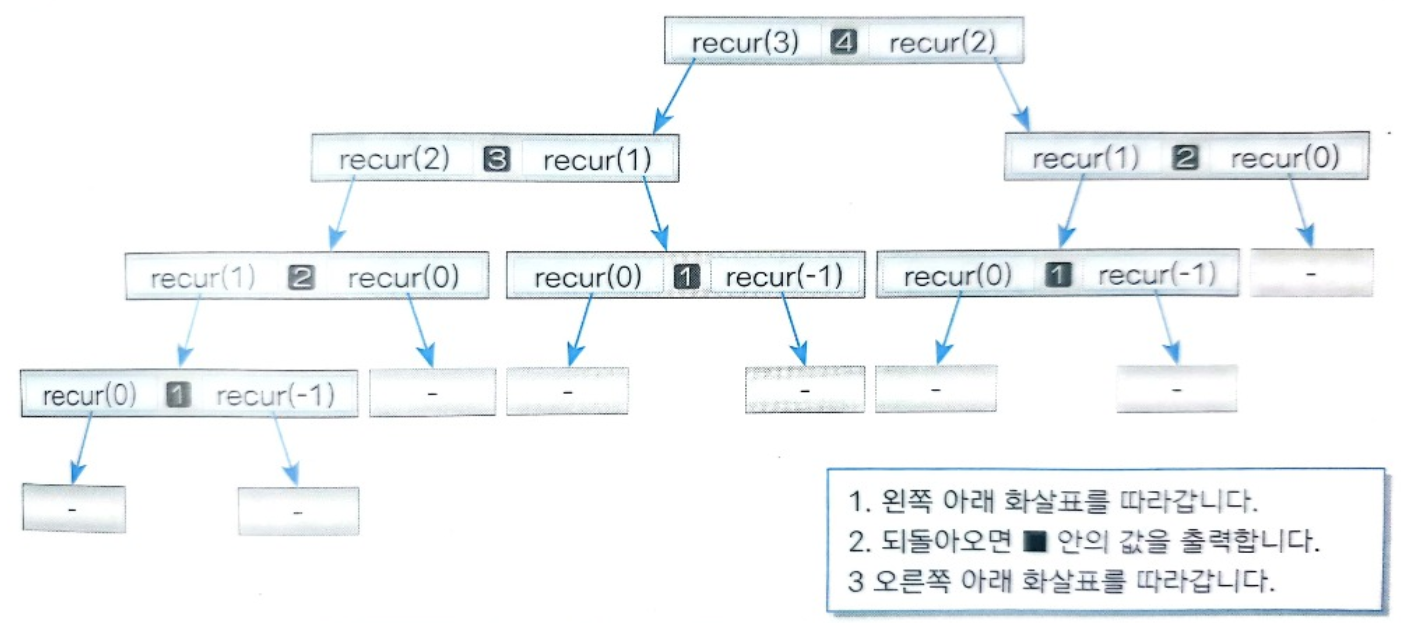

#### 상향식 분석

recur(1)의 실행 과정
1. recur(0)을 실행합니다.
2. 1을 출력합니다.
3. recur(-1)을 실행합니다.

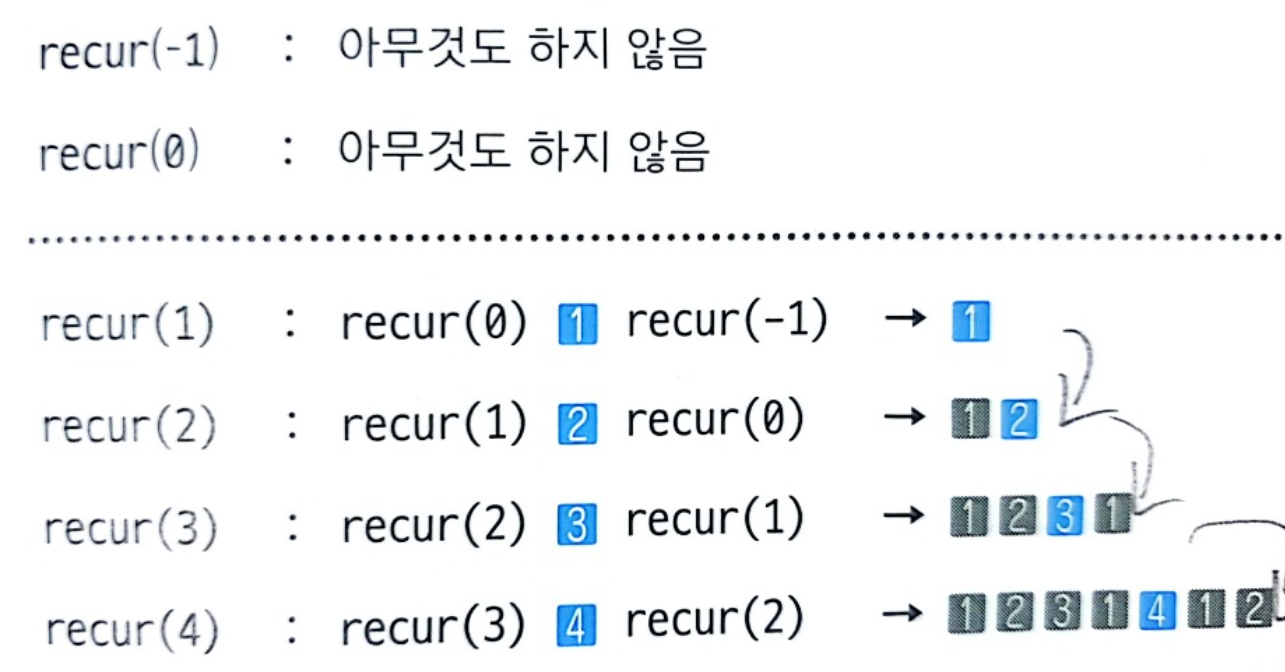

### 재귀 알고리즘의 비재귀적 표현

#### 꼬리 재귀 제거하기

recur(n - 2)  $~ ~ ~ $    ---> $ ~ ~ ~ $       n = n - 2 <br>
'인수로 n - 2의 값을 전달하고 recur() 함수를 호출하는 것' $ ~ ~ ~ $ ---> $ ~ ~ ~ $ n의 값을 n - 2로 업데이트하고 함수의 시작 지점으로 돌아갑니다.

In [6]:
# 비재귀적으로 재귀 함수 구현하기(꼬리 재귀를 제거)

def recur(n: int) -> int:
    """꼬리 재귀를 제거한 recur() 함수"""
    while n > 0:
        recur(n - 1)
        print(n)
        n = n - 2
        
x = int(input('정숫값을 입력하세요.: '))

recur(x)

정숫값을 입력하세요.: 4
1
2
3
1
4
1
2


#### 재귀 제거하기

꼬리 재귀와 달리 맨 앞에서 재귀 호출하는 recur(n - 1)함수는 제거하기가 쉽지 않습니다. 왜냐하면 n값을 출력하기 전에 recur(n - 1)을
실행해야 하기 때문입니다. <br>
이러한 문제는 스택(Stack)으로 해결할 수 있습니다.

In [7]:
# 스택으로 재귀 함수 구현하기(재귀 제거)

from stack import Stack

def recur(n: int) -> int:
    """재귀를 제거한 recur() 함수"""
    s = Stack(n)
    
    while True:
        if n > 0:
            s.push(n)           # n값을 푸시
            n = n - 1
            continue
        if not s.is_empty():   # 스택이 비어 있지 않으면
            n = s.pop()        # 저장한 값을 n에 팝
            print(n)
            n = n - 2
            continue
        break
        
x = int(input('정숫값을 입력하세요.: '))

recur(x)

ModuleNotFoundError: No module named 'stack'

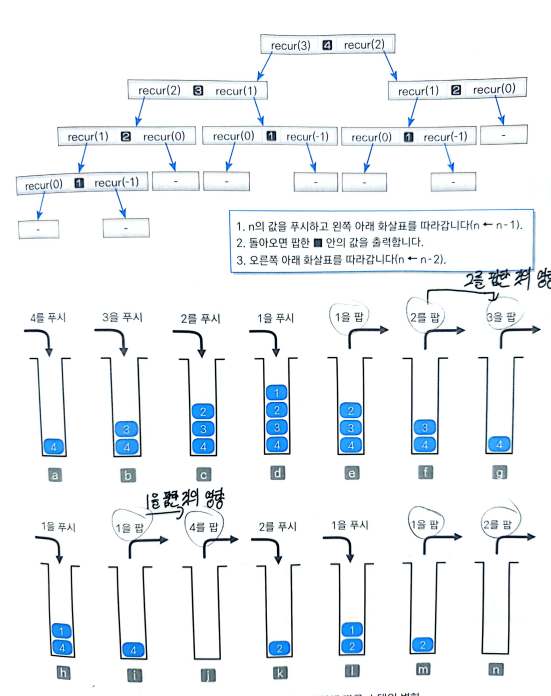